# Intel Image Classification

This is image data of Natural Scenes around the world.

his Data contains around 25k images of size 150x150 distributed under 6 categories.

buildings -> 0,
 
forest -> 1
 
glacier -> 2
 
mountain -> 3
 
sea -> 4,
 
street -> 5 

In [93]:
#load the libraries
import numpy as np
import keras 
import keras.utils as ku
import matplotlib.pyplot as plt

In [94]:
#Load the dataset
train_data=ku.image_dataset_from_directory(directory="seg_train",image_size=(256, 256))
validation_data=ku.image_dataset_from_directory(directory="seg_test",image_size=(256,256))

Found 14039 files belonging to 6 classes.
Found 3001 files belonging to 6 classes.


In [95]:
#Defineing a fuction for visulization of images from the dataset
def image_visulization(path):
    image=ku.load_img(path)
    return image

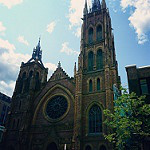

In [113]:
#From class 0 (Building)
image_visulization("10029.jpg")

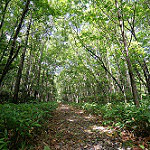

In [97]:
#From class 1 (Forest)
image_visulization("10010.jpg")

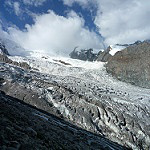

In [98]:
#From class 2 (Glacier)
image_visulization("10003.jpg")

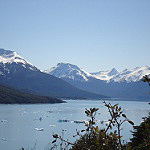

In [99]:
#From class 3 (Mountains)
image_visulization("10107.jpg")

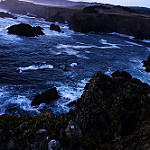

In [100]:
#From class 4 (Sea)
image_visulization("10061.jpg")

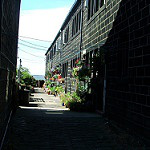

In [101]:
#From class 5 (Street)
image_visulization("20079.jpg")

In [102]:
#Model Building using CNN
#Instantiate the model
model=keras.Sequential()
#Add a convolutional layer
model.add(keras.layers.Conv2D(32,3,3,input_shape=(256,256,3),activation="relu"))
#Adding a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64,3,3,activation="relu"))
#Adding a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128,3,3,activation="relu"))
#Adding a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
#Adding a Flatten layer
model.add(keras.layers.Flatten())
#Network
model.add(keras.layers.Dense(units=256,input_dim=256,activation="relu")) 
model.add(keras.layers.Dense(units=6,activation="softmax"))
#Compliation
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
#Fit
model.fit(train_data,validation_data=validation_data,epochs=10)

Epoch 1/10
439/439 [==============================] - 130s 286ms/step - loss: 1.5843 - accuracy: 0.5195 - val_loss: 1.0756 - val_accuracy: 0.5688
Epoch 2/10
439/439 [==============================] - 89s 202ms/step - loss: 0.9725 - accuracy: 0.6220 - val_loss: 0.9052 - val_accuracy: 0.6475
Epoch 3/10
439/439 [==============================] - 98s 223ms/step - loss: 0.8654 - accuracy: 0.6699 - val_loss: 0.8337 - val_accuracy: 0.6978
Epoch 4/10
439/439 [==============================] - 92s 208ms/step - loss: 0.7698 - accuracy: 0.7075 - val_loss: 0.9345 - val_accuracy: 0.6698
Epoch 5/10
439/439 [==============================] - 89s 203ms/step - loss: 0.6958 - accuracy: 0.7426 - val_loss: 0.7863 - val_accuracy: 0.7004
Epoch 6/10
439/439 [==============================] - 101s 229ms/step - loss: 0.6215 - accuracy: 0.7701 - val_loss: 0.8037 - val_accuracy: 0.7138
Epoch 7/10
439/439 [==============================] - 109s 248ms/step - loss: 0.5648 - accuracy: 0.7913 - val_loss: 0.8613 - val

In [103]:
#Evaluation
model.evaluate(train_data)

439/439 [==============================] - 37s 84ms/step - loss: 0.3831 - accuracy: 0.8611


[0.38306525349617004, 0.8611012101173401]

In [104]:
#Prediction fuction
def predict(path):
    #Loading the image
    test_image=ku.load_img(path,target_size=(256,256))
    #Image processing
    test_image=ku.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    #Prediction
    prediction=model.predict(test_image)
    prediction=np.argmax(prediction)
    return prediction

In [105]:
#Testing with external data
predict("buildingofwallstreet.jpg")

1/1 [==============================] - 0s 250ms/step


5

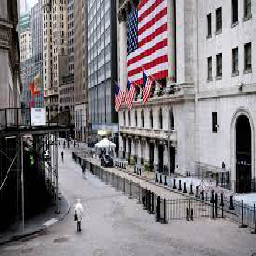

In [106]:
#Verification
ku.load_img("buildingofwallstreet.jpg",target_size=(256,256))

Conclusion=Corectly predicted that its a building image.

In [107]:
#Testing with external data
predict("sea1.jpg")

1/1 [==============================] - 0s 47ms/step


4

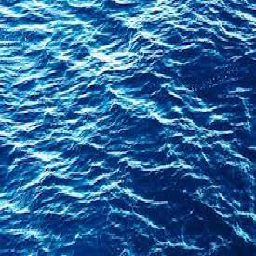

In [108]:
#Verification
ku.load_img("sea1.jpg",target_size=(256,256))

Conlsuion=Correctly predicted as sea.

In [109]:
#Testing with external data
predict("ice.jpg")

1/1 [==============================] - 0s 47ms/step


2

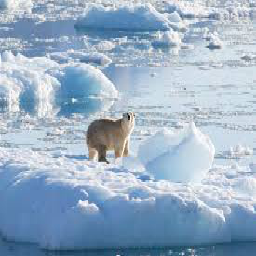

In [110]:
#Verification
ku.load_img("ice.jpg",target_size=(256,256))

Correcly predicted as glacier.

In [111]:
#Testing with external data
predict("building.jpg")

1/1 [==============================] - 0s 33ms/step


1

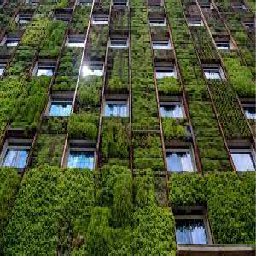

In [112]:
#Verification
ku.load_img("building.jpg",target_size=(256,256))

Conclusion=This is an image of green building, the model is predicting it as Forest. Which is actually a good thing.

# Thank You